# Prediction of MNSIT using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [3]:
# # Intended Way but size of image is too big and time is too less
# from keras.datasets import mnist
# from keras.utils import to_categorical
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

In [4]:
# Go To Way
from sklearn import datasets
data = datasets.load_digits()
x = data.images
y = data.target

from keras.utils import to_categorical
x = x.reshape((x.shape[0], 8, 8, 1))
x = x.astype('float32')/255.0
y = to_categorical(y)
y

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=42)

In [5]:
model = Sequential([
    Conv2D(32, input_shape=(8,8,1), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
43/43 [==============================] - 2s 30ms/step - loss: 2.2892 - accuracy: 0.1514 - val_loss: 2.2724 - val_accuracy: 0.3622
Epoch 2/50
43/43 [==============================] - 1s 21ms/step - loss: 2.2378 - accuracy: 0.4046 - val_loss: 2.1923 - val_accuracy: 0.5222
Epoch 3/50
43/43 [==============================] - 1s 26ms/step - loss: 2.1144 - accuracy: 0.5442 - val_loss: 2.0150 - val_accuracy: 0.5578
Epoch 4/50
43/43 [==============================] - 1s 24ms/step - loss: 1.8680 - accuracy: 0.6318 - val_loss: 1.7056 - val_accuracy: 0.6111
Epoch 5/50
43/43 [==============================] - 1s 24ms/step - loss: 1.5320 - accuracy: 0.7097 - val_loss: 1.3450 - val_accuracy: 0.7222
Epoch 6/50
43/43 [==============================] - 1s 26ms/step - loss: 1.1885 - accuracy: 0.7981 - val_loss: 1.0339 - val_accuracy: 0.8400
Epoch 7/50
43/43 [==============================] - 1s 20ms/step - loss: 0.9260 - accuracy: 0.8471 - val_loss: 0.8108 - val_accuracy: 0.8378
Epoch 8/50
43

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

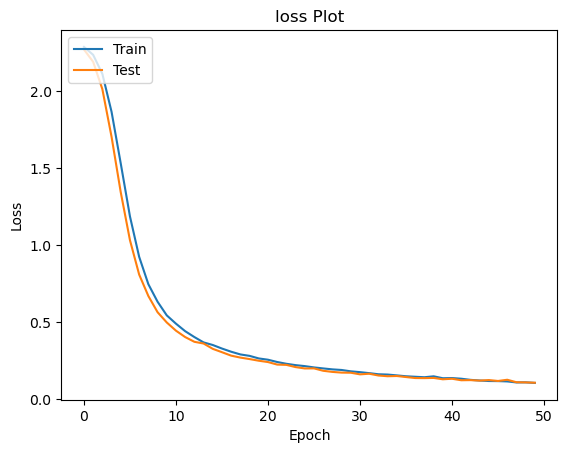

In [7]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

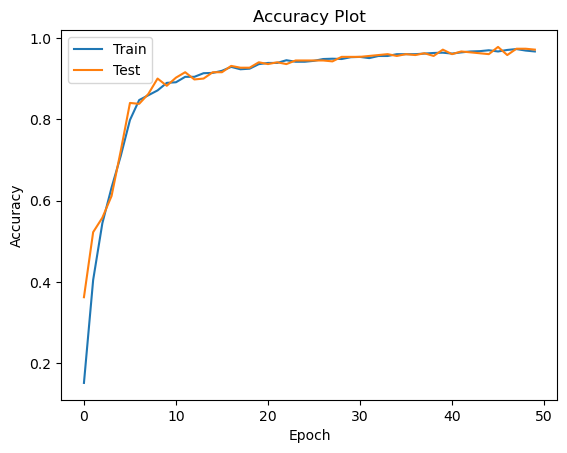

In [8]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
